In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("../data/gene_per_subgroup_correlation_sorted_melt.csv")

In [14]:
group_columns = ['WNT', 'SHH', 'Group3', 'Group4']

In [15]:
data

,Gene,Group,Correlation
0,FAM65B,Group4,0.979231
1,ZFPM2,WNT,0.957692
2,ZFPM2,Group3,0.957692
3,PLCH1,SHH,0.955385
4,SIX6,Group4,0.955351
...,...,...,...
3138,CYTH3,Group4,0.486154
3139,DKK4,WNT,0.485445
3140,CSTF3,Group3,0.485385
3141,SNRPC,Group3,0.485385


In [23]:
# Sorting the plot_df by correlation in descending order and selecting the top N genes per group
top_n = 50  # Set the desired number of genes to display per group

top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)

top_genes_per_group

/tmp/ipykernel_13156/189381725.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)


,Gene,Group,Correlation
0,ZFPM2,Group3,0.957692
1,FOXG1,Group3,0.947957
2,FSTL5,Group3,0.942308
3,PAPPA2,Group3,0.941538
4,IMPG2,Group3,0.941538
...,...,...,...
195,LRRC55,WNT,0.876923
196,SYT1,WNT,0.875385
197,SYT2,WNT,0.874615
198,PLXDC1,WNT,0.872308


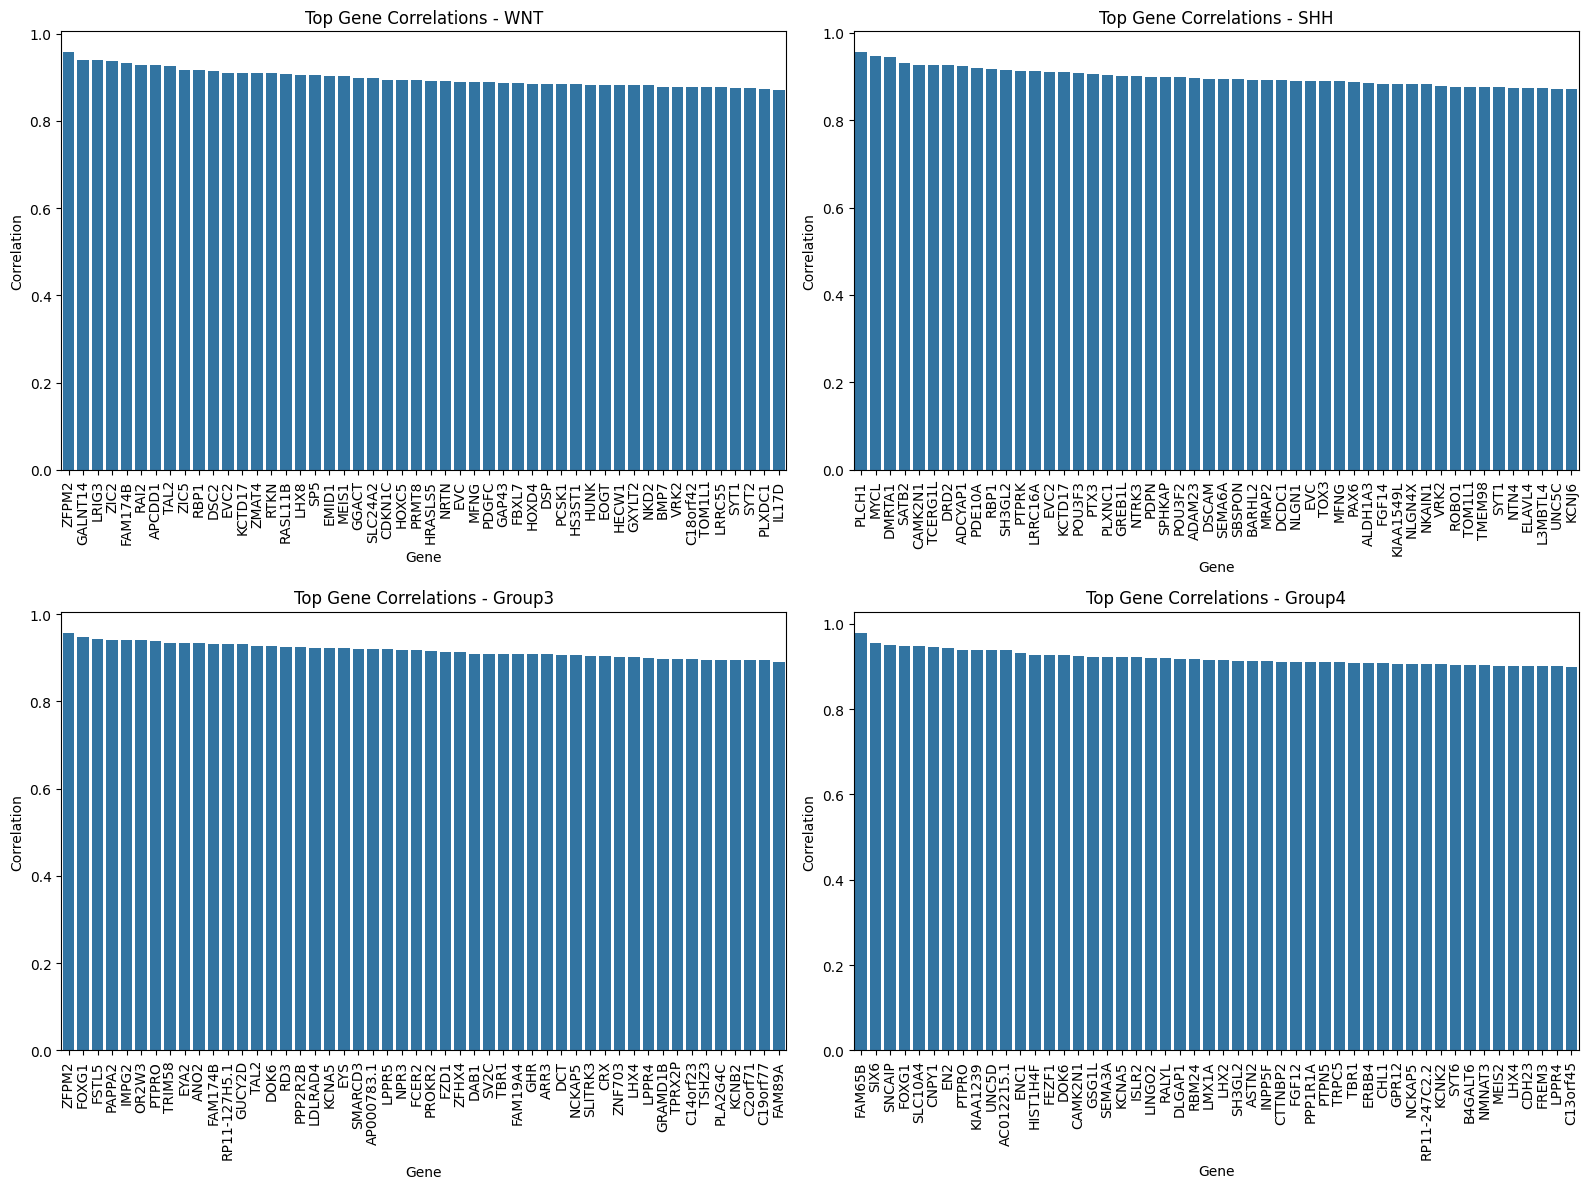

In [24]:
# Creating separate plots for each group
plt.figure(figsize=(16, 12))

group_list = ["WNT", "SHH", "Group3", "Group4"]
for i, group in enumerate(group_list, 1):
    plt.subplot(2, 2, i)
    group_data = top_genes_per_group[top_genes_per_group['Group'] == group]
    if not group_data.empty:
        sns.barplot(data=group_data, x="Gene", y="Correlation", dodge=False)
        plt.xticks(rotation=90)
        plt.title(f"Top Gene Correlations - {group}")

plt.tight_layout()
plt.show()

example: top 30 correlated genes for WNT

In [25]:
top_genes_per_group[top_genes_per_group["Group"] == "WNT"]["Gene"].reset_index(drop=True).to_list()

['ZFPM2',
 'GALNT14',
 'LRIG3',
 'ZIC2',
 'FAM174B',
 'RAI2',
 'APCDD1',
 'TAL2',
 'ZIC5',
 'RBP1',
 'DSC2',
 'EVC2',
 'KCTD17',
 'ZMAT4',
 'RTKN',
 'RASL11B',
 'LHX8',
 'SP5',
 'EMID1',
 'MEIS1',
 'GGACT',
 'SLC24A2',
 'CDKN1C',
 'HOXC5',
 'PRMT8',
 'HRASLS5',
 'NRTN',
 'EVC',
 'MFNG',
 'PDGFC',
 'GAP43',
 'FBXL7',
 'HOXD4',
 'DSP',
 'PCSK1',
 'HS3ST1',
 'HUNK',
 'EOGT',
 'HECW1',
 'GXYLT2',
 'NKD2',
 'BMP7',
 'VRK2',
 'C18orf42',
 'TOM1L1',
 'LRRC55',
 'SYT1',
 'SYT2',
 'PLXDC1',
 'IL17D']